# Dataset Observations

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
print("Reading Training data...")
train_df = pd.read_csv("/kaggle/input/data-science-bowl-2019/train.csv", parse_dates=['timestamp'])#, converters = {"event_data": json.loads})
print('The training data has {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))

print("Reading Test data...")
test_df = pd.read_csv("/kaggle/input/data-science-bowl-2019/test.csv", parse_dates = ['timestamp'])
print("The test data has {} rows and {} columns.".format(test_df.shape[0], test_df.shape[1]))

print("Reading Training Label data...")
train_labels_df = pd.read_csv("/kaggle/input/data-science-bowl-2019/train_labels.csv")
print("The training labels data has {} rows and {} columns.".format(train_labels_df.shape[0], train_labels_df.shape[1]))

print("Reading Specs Data...")
specs_df = pd.read_csv("/kaggle/input/data-science-bowl-2019/specs.csv")
print("The specs data has {} rows and {} columns.".format(specs_df.shape[0], specs_df.shape[1]))

print("Reading sample Submission...")
sample_submission_df = pd.read_csv("/kaggle/input/data-science-bowl-2019/sample_submission.csv")
print("The sample submission has {} rows and {} columns".format(sample_submission_df.shape[0], sample_submission_df.shape[1]))

Reading Training data...
The training data has 11341042 rows and 11 columns.
Reading Test data...
The test data has 1156414 rows and 11 columns.
Reading Training Label data...
The training labels data has 17690 rows and 7 columns.
Reading Specs Data...
The specs data has 386 rows and 3 columns.
Reading sample Submission...
The sample submission has 1000 rows and 2 columns


In [3]:
print("The training data has {} missing values.".format(sum(train_df.isnull().sum())))
print("The training label data has {} missing values.".format(sum(train_labels_df.isnull().sum())))
print("The test data has {} missing values.".format(sum(test_df.isnull().sum())))
print("The specs data has {} missing values.".format(sum(specs_df.isnull().sum())))

The training data has 0 missing values.
The training label data has 0 missing values.
The test data has 0 missing values.
The specs data has 0 missing values.


In the training data are in total 17000 unique installations, which is our sample size.
In the test data we have 1000 unique installations ids. Those 1000 are our sample size there.[](http://)

In [4]:
for (name, data) in train_df.drop("event_data", axis = 1).iteritems():
    unique = len(data.unique())
    print("The column {} of the training data has {} unique entries.".format(name,unique))

The column event_id of the training data has 384 unique entries.
The column game_session of the training data has 303319 unique entries.
The column timestamp of the training data has 10777308 unique entries.
The column installation_id of the training data has 17000 unique entries.
The column event_count of the training data has 3368 unique entries.
The column event_code of the training data has 42 unique entries.
The column game_time of the training data has 834048 unique entries.
The column title of the training data has 44 unique entries.
The column type of the training data has 4 unique entries.
The column world of the training data has 4 unique entries.


In [5]:
for (name, data) in test_df.iteritems():
    unique = len(data.unique())
    print("The column {} of the test data has {} unique entries.".format(name,unique))

The column event_id of the test data has 365 unique entries.
The column game_session of the test data has 28445 unique entries.
The column timestamp of the test data has 1103166 unique entries.
The column event_data of the test data has 1120854 unique entries.
The column installation_id of the test data has 1000 unique entries.
The column event_count of the test data has 4456 unique entries.
The column event_code of the test data has 42 unique entries.
The column game_time of the test data has 309119 unique entries.
The column title of the test data has 44 unique entries.
The column type of the test data has 4 unique entries.
The column world of the test data has 4 unique entries.


# Exploratory Data Analysis
## Type of Activity and its Distribution
The test and training data has the same distribution regarding the type of media. It seems, both are representative data.

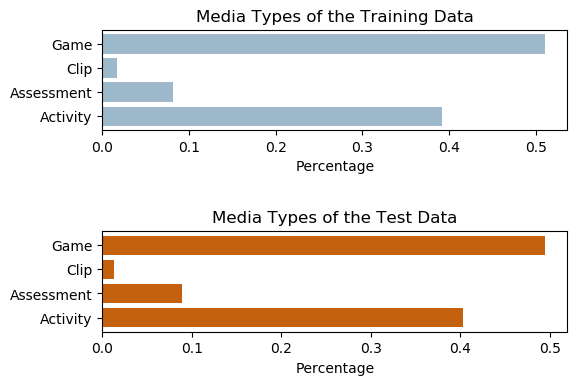

In [6]:
#Visualization of Type of Activity 
media_train = train_df.loc[:,["type", "event_id"]].groupby("type").count()
media_test = test_df.loc[:,["type", "event_id"]].groupby("type").count()

plt.figure(dpi = 100)
plt.subplot(2,1,1)
plt.barh(media_train.index, width = media_train["event_id"]/len(train_df), color = (0.36,0.54,0.66, 0.6))
plt.title('Media Types of the Training Data')
plt.xlabel('Percentage')
plt.subplot(2,1,2)
plt.barh(media_test.index, width = media_test["event_id"]/len(test_df), color = (0.77,0.38,0.06, 1))
plt.title('Media Types of the Test Data')
plt.xlabel('Percentage')
plt.subplots_adjust(hspace = 1)
plt.show()

The same can be said about the distribution of the world per game session used in both datasets.

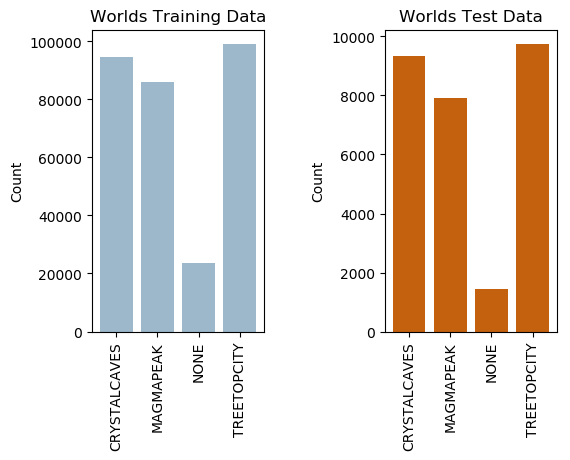

In [7]:
world_train = train_df.loc[:,["world", "game_session"]].groupby("world")["game_session"].nunique()
world_test = test_df.loc[:,["world", "game_session"]].groupby("world")["game_session"].nunique()


plt.figure(dpi = 100)
plt.subplot(1,2,1)
plt.bar(world_train.index, world_train, color = (0.36,0.54,0.66, 0.6))
plt.ylabel("Count")
plt.xticks(rotation = "vertical")
plt.title("Worlds Training Data")

plt.subplot(1,2,2)
plt.bar(world_test.index, world_test, color = (0.77,0.38,0.06, 1))
plt.ylabel("Count")
plt.xticks(rotation = "vertical")
plt.title("Worlds Test Data")
plt.subplots_adjust(wspace = 0.7)
plt.show()

## Distribution of the Labels
The accuracy group is more present than the other accuracy groups. There are just half the observation with accuracy group 0 compared to accuracy group 3. For the levels 1 and 2 there are even less observations.

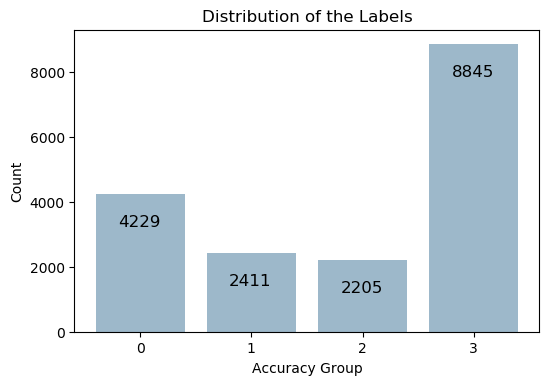

In [8]:
#Group the data so we can get the absolute count
label_group = train_labels_df.groupby("accuracy_group").count()

#Create the labels for the positioning of the text
labels_count = label_group["game_session"]
bar_position = label_group.index

#plot the graph
plt.figure(dpi=100)
plt.bar(x = label_group.index, height = label_group["game_session"], color = (0.36,0.54,0.66, 0.6))
plt.xlabel("Accuracy Group")
plt.xticks([0,1,2,3])
plt.ylabel("Count")
plt.title("Distribution of the Labels")
for i in range(len(labels_count)):
    plt.text(x = bar_position[i]-0.2, y = labels_count[i] - 1000, s = labels_count[i], size = 12)
plt.show()

## Assessment Group by Assessment Title

It seems that the assessments Mushroom Sorter, Cart Balancer and Cauldron Filler are easier or have a better learning path to achieve good results. The majority is in the accuracy group 3. For Chest Sorter it is the opposite case. The majority of people don't even manage to successful finish the assessment. For the Bird Measurer it seems more balanced throughout the accuracy groups even though there is a small tendency to the lower end of the accuracy groups.

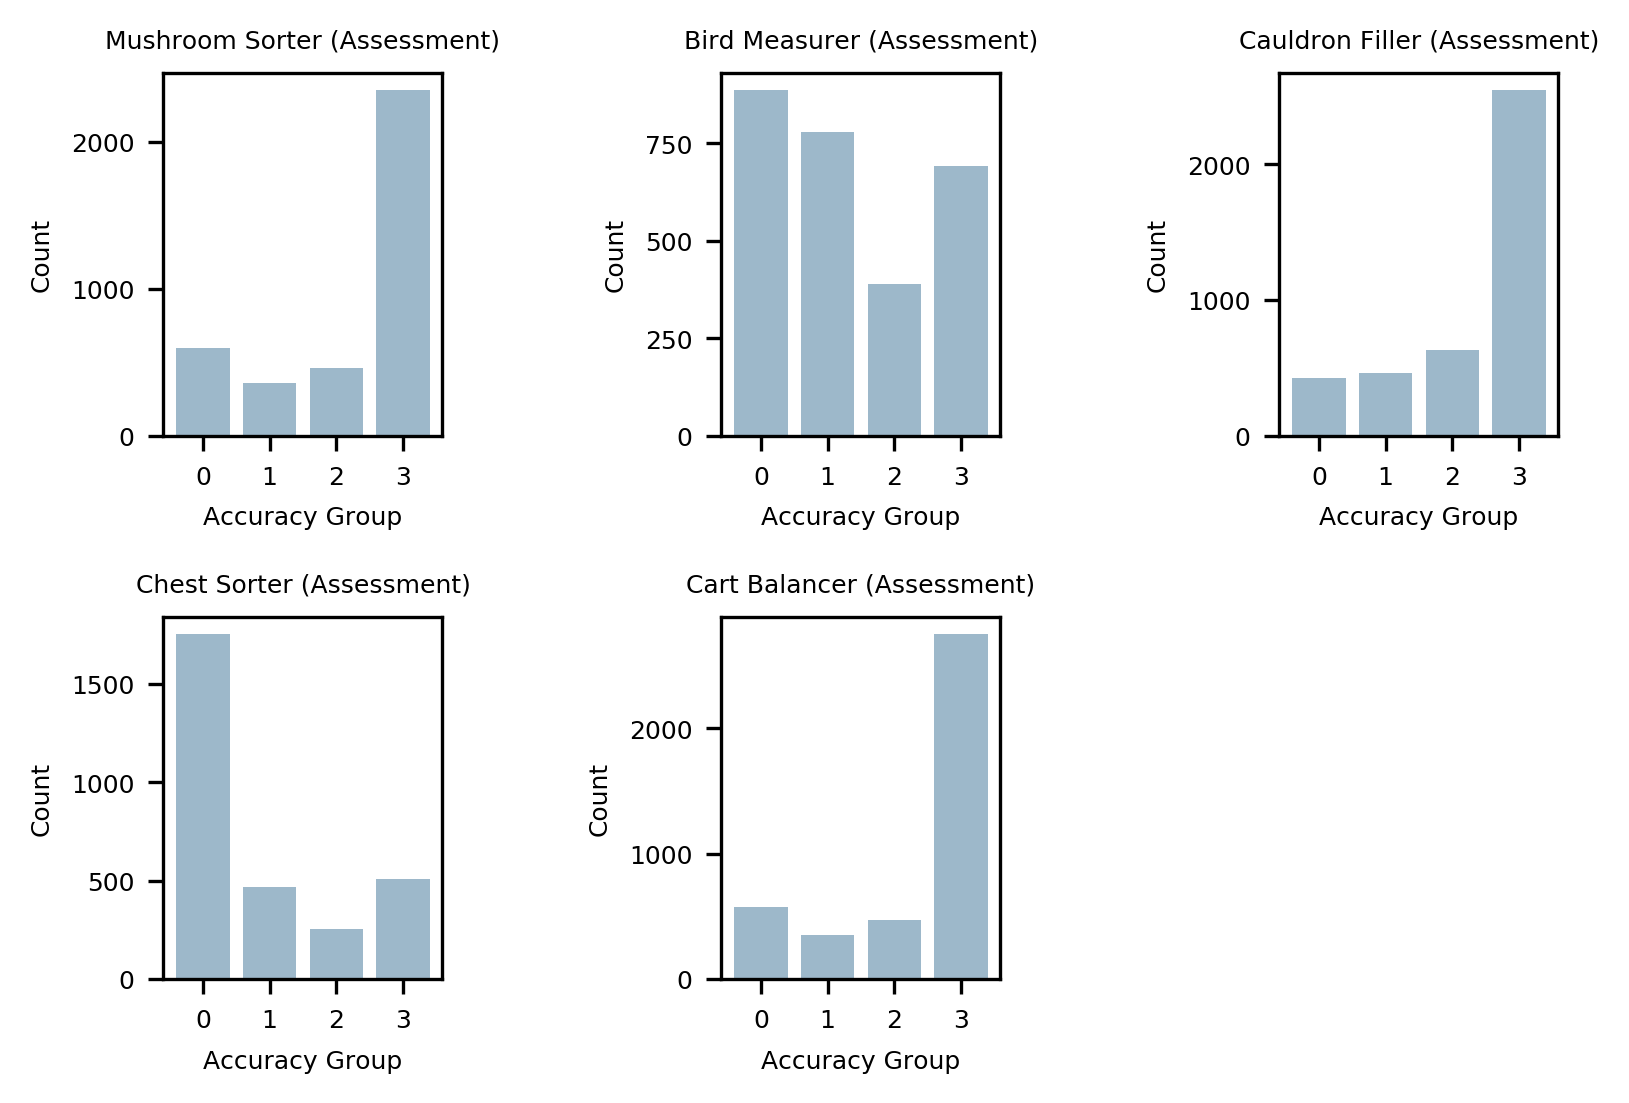

In [9]:
def plot_by_group(dataset, column_name, groupby, xlabel, ylabel):
    
    plt.figure(dpi = 300)
    levels = dataset[column_name].unique()
    
    for i in range(len(levels)):
        
        df = dataset[dataset[column_name] == levels[i]].groupby(groupby).count()
        
        plt.subplot(round(len(levels)/2), round(len(levels)/2)+1, i+1)
        plt.bar(x = df.index, height = df["game_session"], color = (0.36,0.54,0.66, 0.6))
        plt.xticks([0,1,2,3], fontsize = 6)
        plt.yticks(fontsize = 6)
        plt.xlabel(xlabel, fontsize = 6)
        plt.ylabel(ylabel, fontsize = 6)
        plt.title(levels[i], fontdict = {"fontsize": 6})

    plt.subplots_adjust(hspace = 0.5, wspace = 1)
    plt.show()
    
plot_by_group(train_labels_df, "title", "accuracy_group", "Accuracy Group", "Count")

## Type of Media played per World
Clips are the most used media. It probably like this, because there are more titles which are clips compared to the other media types. At the same time after every game, activity or assessment there is probably a clip as introduction for the next activity. It is interesting that in Magmapeak the amount of activities and games compared to the clip is higher than in the other worlds.

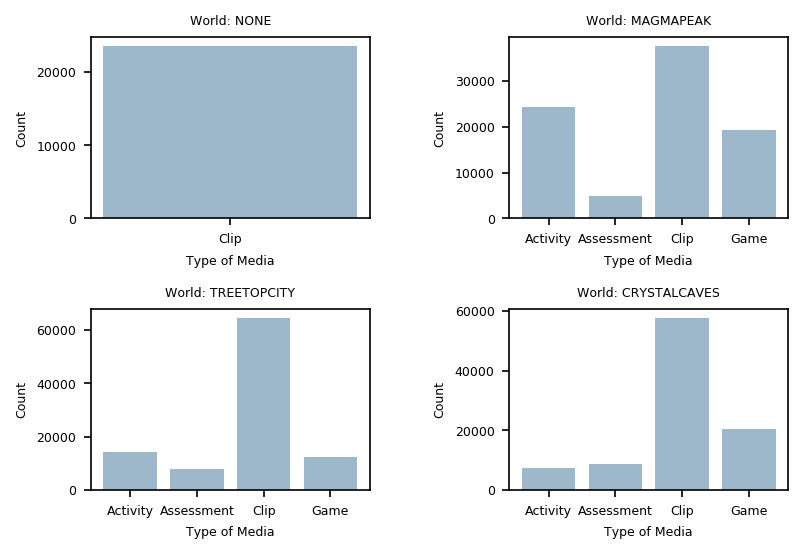

In [10]:
worlds = train_df["world"].unique()
worlds

plt.figure(dpi = 150)

for i in range(len(worlds)):
    world_filter = train_df[train_df["world"] == worlds[i]].groupby("type")["game_session"].nunique()
    
    plt.subplot(2,2,i+1)
    plt.bar(x = world_filter.index, height = world_filter, color =  (0.36,0.54,0.66, 0.6))
    plt.xlabel("Type of Media", fontsize = 6)
    plt.ylabel("Count", fontsize = 6)
    plt.xticks(fontsize = 6)
    plt.yticks(fontsize = 6)
    plt.title("World: {}".format(worlds[i]), fontdict = {"fontsize": 6})
    
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)  
plt.show()

## Event Count per World and Title
It is interesting that Magmapeak has the most actions even though it is not the most played world per game session. It seems that the some titles in Magmapeak include more actions than in the other worlds. Also Magmapeak has the lowest amounts of title (see further below) of the three worlds. The reason for the high amount of actions should be looked into.

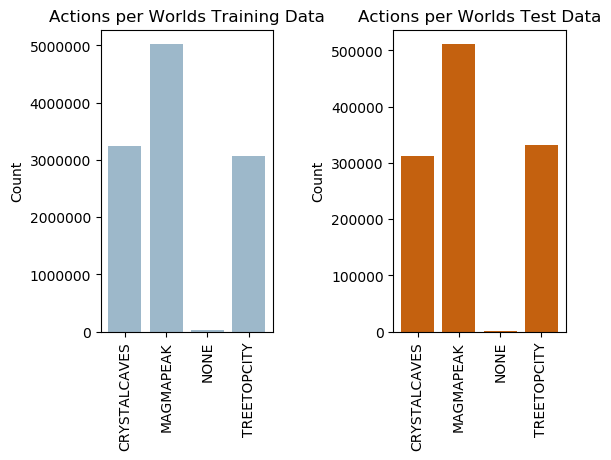

In [11]:
world_train = train_df.loc[:,["world", "event_id"]].groupby("world").count()
world_test = test_df.loc[:,["world", "event_id"]].groupby("world").count()


plt.figure(dpi = 100)
plt.subplot(1,2,1)
plt.bar(world_train.index, world_train["event_id"], color = (0.36,0.54,0.66, 0.6))
plt.ylabel("Count")
plt.xticks(rotation = "vertical")
plt.title("Actions per Worlds Training Data")

plt.subplot(1,2,2)
plt.bar(world_test.index, world_test["event_id"], color = (0.77,0.38,0.06, 1))
plt.ylabel("Count")
plt.xticks(rotation = "vertical")
plt.title("Actions per Worlds Test Data")
plt.subplots_adjust(wspace = 0.7)
plt.show()

Here it can be already seen, that out of the 5 titles with the most actions 3 belongs to the world magmapeak. One is a game and two are activities. It would be interesting to see if either the kids have a lot of wrong submissions for the game or a lot of interactions with the activity

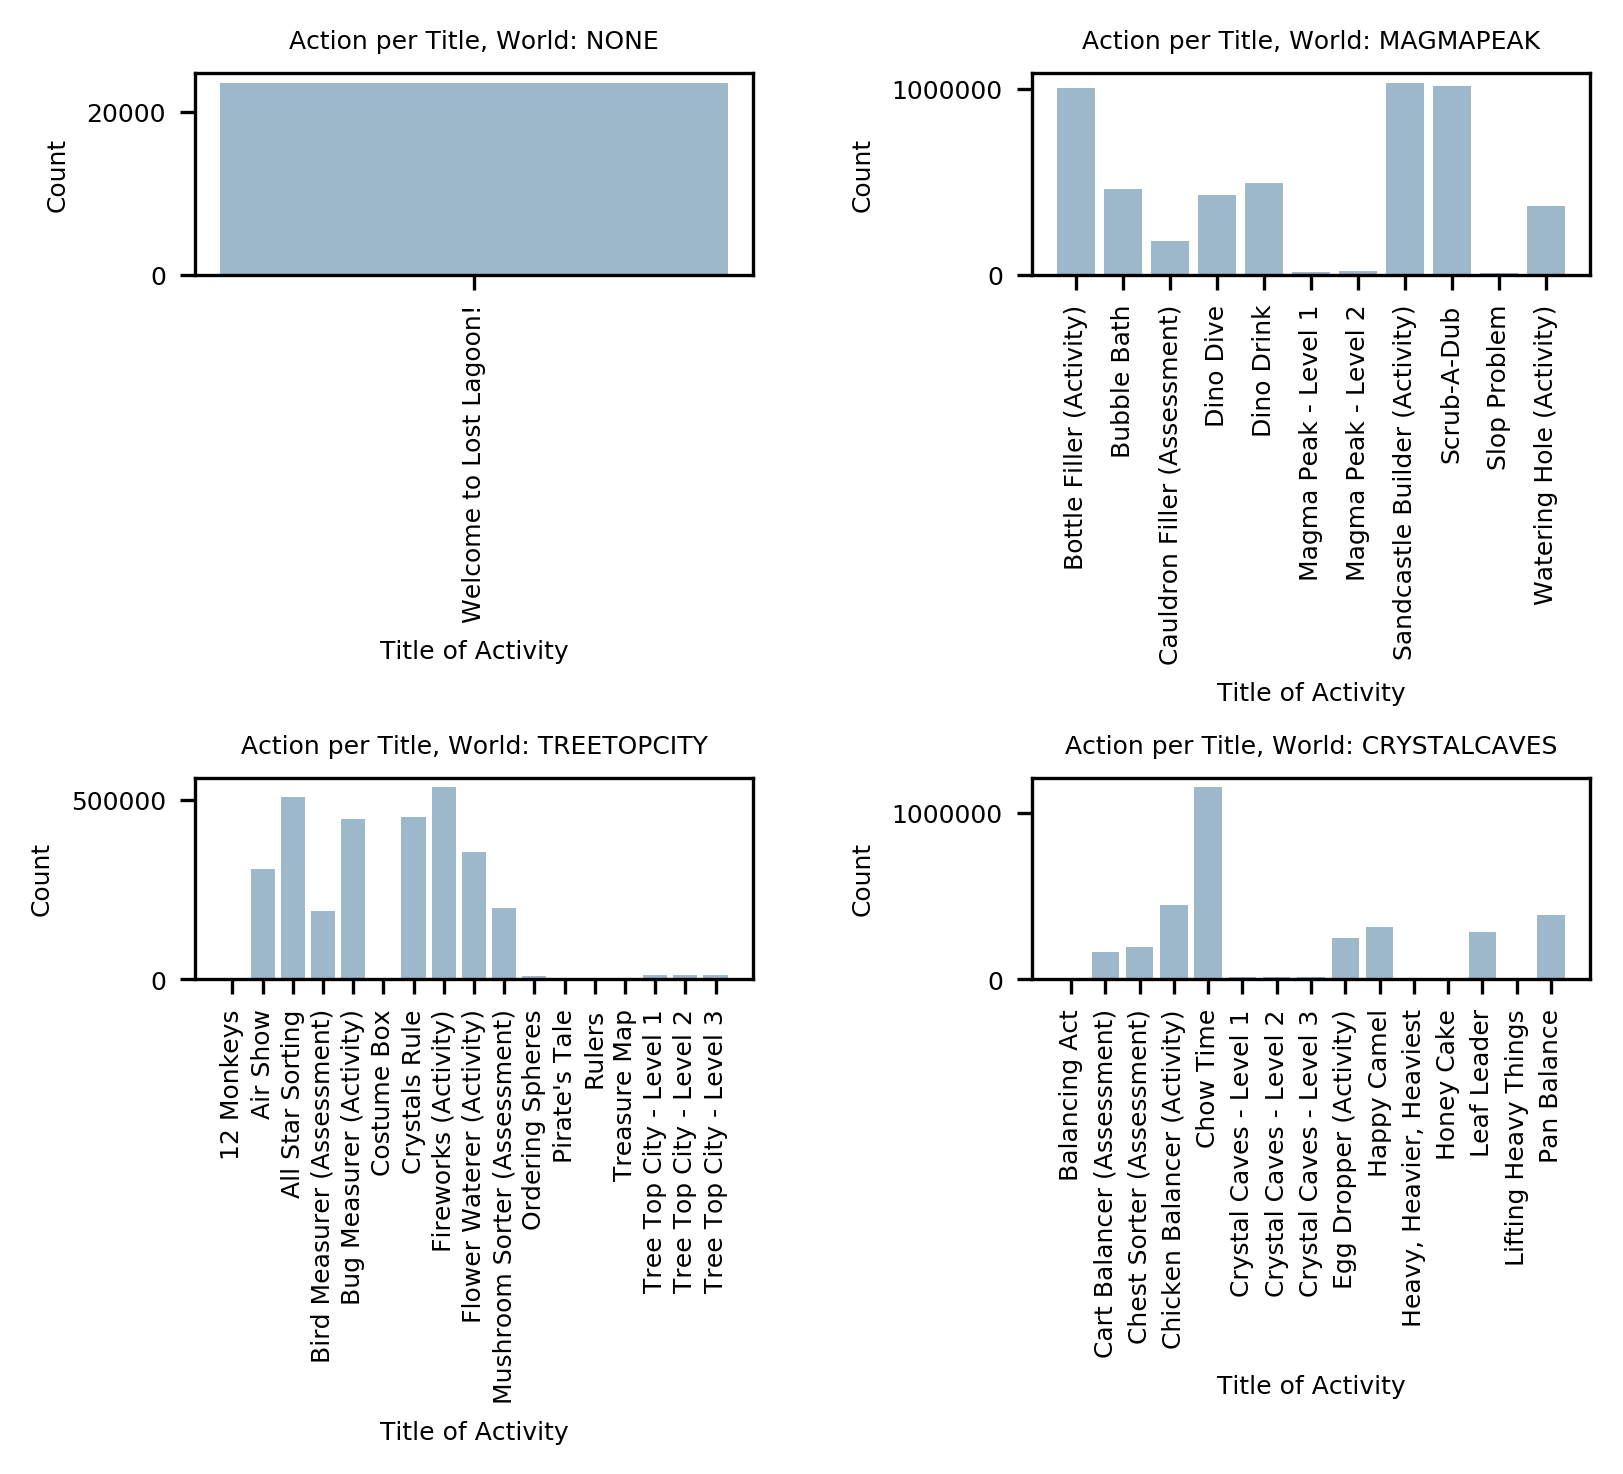

In [12]:
plt.figure(dpi = 300)

for i in range(len(worlds)):
    world_filter = train_df[train_df["world"] == worlds[i]].groupby("title").count()
    
    plt.subplot(2,2,i+1)
    plt.bar(x = world_filter.index, height = world_filter["game_session"], color =  (0.36,0.54,0.66, 0.6))
    plt.xlabel("Title of Activity", fontsize = 6)
    plt.ylabel("Count", fontsize = 6)
    plt.xticks(fontsize = 6, rotation = "vertical")
    plt.yticks(fontsize = 6)
    plt.title("Action per Title, World: {}".format(worlds[i]), fontdict = {"fontsize": 6})
    
plt.subplots_adjust(hspace = 2.5, wspace = 0.5)  
plt.show()

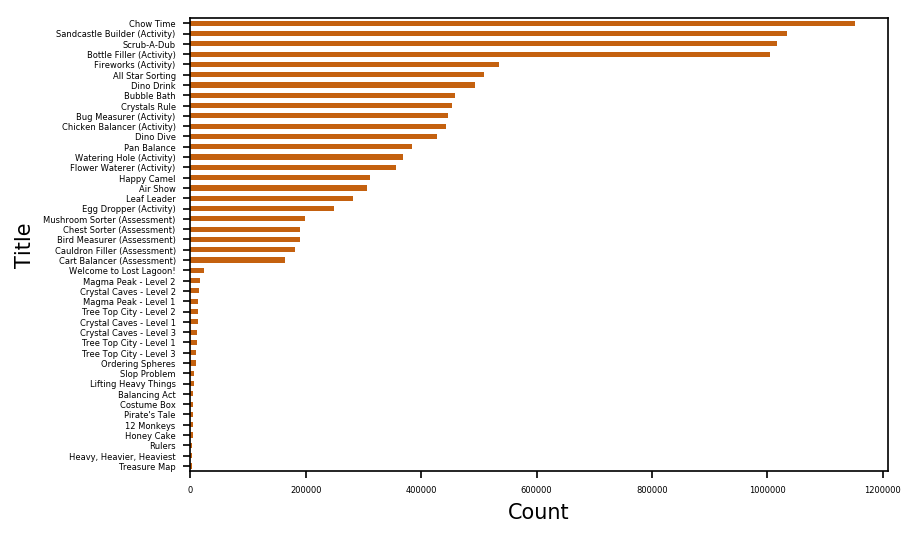

In [13]:
df_title = train_df["title"].value_counts().sort_values(ascending=True)

plt.figure(dpi=150)
df_title.plot.barh(color =  (0.77,0.38,0.06, 1))
plt.xlabel("Count")
plt.ylabel("Title")
plt.yticks(size = 4)
plt.xticks(size = 4)
plt.show()

## Title and the belonging type of media

In [14]:
#Print the Type of Activity per Title for each city
for entry in worlds:
    world_filter = train_df[train_df["world"] == entry].groupby(["type", "title"]).count()
    
    world_filter = world_filter.index
    
    activity = [act[0] for act in world_filter]
    title = [act[1] for act in world_filter]
    
    df = pd.DataFrame({"Type of Activity": activity, "Title": title})
    
    print("World: {}".format(entry))
    print(df)
    print("")

World: NONE
  Type of Activity                    Title
0             Clip  Welcome to Lost Lagoon!

World: MAGMAPEAK
   Type of Activity                          Title
0          Activity       Bottle Filler (Activity)
1          Activity  Sandcastle Builder (Activity)
2          Activity       Watering Hole (Activity)
3        Assessment   Cauldron Filler (Assessment)
4              Clip           Magma Peak - Level 1
5              Clip           Magma Peak - Level 2
6              Clip                   Slop Problem
7              Game                    Bubble Bath
8              Game                      Dino Dive
9              Game                     Dino Drink
10             Game                    Scrub-A-Dub

World: TREETOPCITY
   Type of Activity                         Title
0          Activity       Bug Measurer (Activity)
1          Activity          Fireworks (Activity)
2          Activity     Flower Waterer (Activity)
3        Assessment    Bird Measurer (Assessment)
